# Importing of Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Impoting of Datasets

In [11]:
customer=pd.read_csv('customer_features.csv')
lmonth=pd.read_csv('last_month_assortment.csv')
nmonth=pd.read_csv('next_month_assortment.csv')
next_month=pd.read_csv('next_purchase_order.csv')
orignal=pd.read_csv('original_purchase_order.csv')
product=pd.read_csv('product_features.csv')

In [4]:
# As for this case study we have a path to proceed but follow your Convenient path:
# python are_we_going_to_survive.py original_purchase_order.csv 
# next_purchase_order.csv 
# customer_features.csv 
# product_features.csv 
# last_month_assortment.csv 
# next_month_assortment.csv 

In [5]:
orignal.head()

,product_id,quantity_purchased,cost_to_buy,retail_value
0,1769808,77,2.20,16.67
1,1896283,67,1.46,9.59
2,1889979,80,2.06,13.36
3,1341288,85,1.25,6.57
4,1666328,60,1.51,10.49


In [6]:
# adding a extra dimension to the dataframe which is ""price_for_which_we_bought"" which is the product of "quantity_purchased"
# and cost_to_buy which tell us how much its costs us to buys 'n' quantity of perticulat product.

In [7]:
orignal['price_for_which_we_bought']=orignal['quantity_purchased']*orignal['cost_to_buy']

In [8]:
# It is mentioned in the problem statment that loan amount taken but us as same as the total book bought in the orignal Dataset.

In [10]:
loan_amount=sum(orignal['price_for_which_we_bought'])
print('Loan amount:{}'.format(loan_amount))

Loan amount:135546.42


In [13]:
next_month.head()

,product_id,quantity_purchased,cost_to_buy,retail_value
0,1479507,39,1.82,12.68
1,1681385,55,1.73,12.88
2,1771749,37,1.26,10.38
3,1605149,49,1.47,11.27
4,1861356,34,1.98,10.41


In [23]:
# now we can calculate the amount which will be needed to purchase the next month stock.
next_month['price_for_which_we_bought']=next_month['quantity_purchased']*next_month['cost_to_buy']

In [24]:
next_month_investment=sum(next_month['price_for_which_we_bought'])
print('next month investment:{}'.format(round(next_month_investment,2)))

next month investment:24155.51


In [27]:
#Total money we want after sale to recover next month purchase and loan amount is:
#so it we get the total sales money more than this then we are in profit.
total_amount=loan_amount+next_month_investment
print('total amount:{}'.format(total_amount))

total amount:159701.93


# Treating Null values in customer data set:

In [28]:
customer.head()

,customer_id,age_bucket,is_returning_customer,favorite_genres
0,1000078,46-55,True,"['Classic', 'History', 'Self-Help', 'Romance',..."
1,1000102,46-55,True,"['Beach-Read', 'Pop-Sci', 'Pop-Psychology', 'B..."
2,1000185,46-55,True,"['Romance', 'Self-Help', 'Beach-Read', 'Pop-Ps..."
3,1000423,26-35,True,"['Classic', 'Drama']"
4,1000696,66+,True,"['Drama', 'Thriller', 'Sci-Fi', 'Romance', 'Hi..."


In [30]:
g=customer.groupby('favorite_genres')
a=customer['favorite_genres'].unique()
df=pd.DataFrame([np.arange(len(customer.columns))],columns=customer.columns,index=['a'])
for i in a:
    f1=g.get_group(i)
    df=pd.concat([df,f1])#It will concat all grouped data frame with df which is a dummy dataframe made for just concating.

In [31]:
customer=df[df.index!='a'] #This data frame consists all the rows sorted according to the grouped favorite_genres.

In [34]:
customer=customer.fillna(method='ffill')# As the dataframe is sorted by groups we can forward fill the values to impute null.
customer.reset_index(inplace=True)
customer.drop(columns='index',inplace=True)

In [35]:
product.head()

,product_id,length,difficulty,fiction,genre
0,1769808,148,3,False,Self-Help
1,1896283,161,5,False,Biography
2,1889979,296,4,False,History
3,1341288,551,4,True,Thriller
4,1666328,623,-1,True,Sci-Fi


# Concat test train:

In [37]:
# Here next_month_assortment is Test as we dont have "purchased" column in it and last_month_assortment is Train
full_data=pd.concat([lmonth,nmonth])

# Merging of datasets:

In [38]:
required=orignal[['product_id','retail_value']]

In [40]:
first=pd.merge(full_data,product,how='left',on='product_id')
final=pd.merge(first,customer,how='left',on='customer_id')
final=pd.merge(final,required,how='left',on='product_id')

In [41]:
final.drop(columns='favorite_genres',inplace=True)
final['difficulty']=final['difficulty'].astype('object') # For Lable encoding

In [44]:
train=final[final['purchased'].notnull()]
test=final[final['purchased'].isnull()]
test.drop(columns='purchased',inplace=True)

In [46]:
from sklearn.preprocessing import LabelEncoder # Lable encoding the features with are in the object form.
le=LabelEncoder()

In [47]:
train['difficulty']=le.fit_transform(train['difficulty'])
test['difficulty']=le.transform(test['difficulty'])
train['fiction']=le.fit_transform(train['fiction'])
test['fiction']=le.transform(test['fiction'])
train['genre']=le.fit_transform(train['genre'])
test['genre']=le.transform(test['genre'])
train['age_bucket']=le.fit_transform(train['age_bucket'])
test['age_bucket']=le.transform(test['age_bucket'])
train['age_bucket']=le.fit_transform(train['age_bucket'])
test['age_bucket']=le.transform(test['age_bucket'])
train['purchased']=le.fit_transform(train['purchased'])

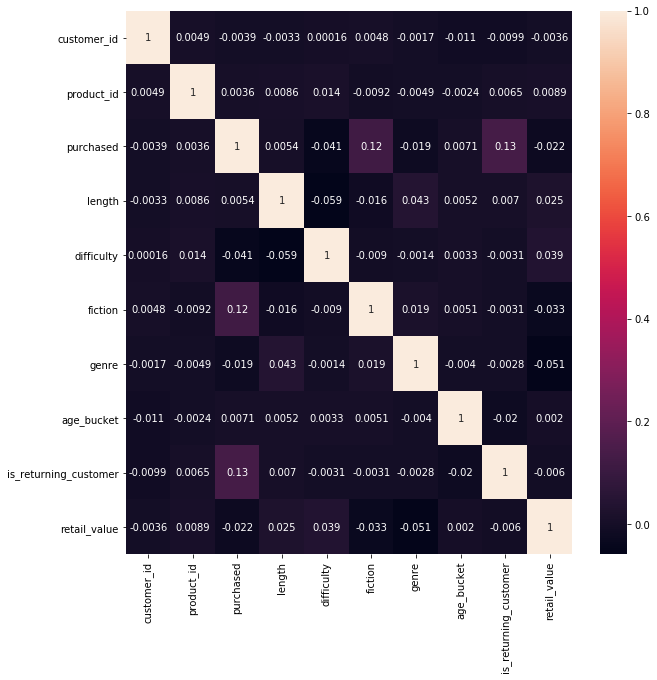

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

In [51]:
#Final Data sets is ready for modeling first build the model with all the features and then perform feature engneering.
# To validate the score we diving the dataset into train and valadation data set.

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [56]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,random_state=0,test_size=0.3)

# Used xgboost for model building: 

In [54]:
from xgboost import XGBClassifier
xg=XGBClassifier()

In [57]:
model=xg.fit(xtrain,ytrain)
predicter=model.predict(xtest)

In [60]:
print('accuracy_score:{}'.format(accuracy_score(ytest,predicter)))

accuracy_score:0.7576851851851852


In [61]:
#seems that without Feature engneering(with all features) we are getting accuracy_score of 0.7576851851851852.

In [62]:
from sklearn.metrics import confusion_matrix 

In [64]:
confusion_matrix(ytest,predicter)

array([[5877, 1042],
       [1575, 2306]], dtype=int64)

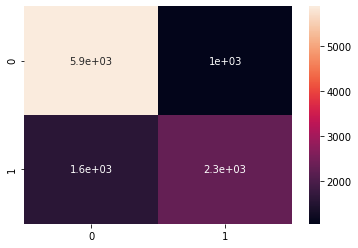

In [65]:
sns.heatmap(confusion_matrix(ytest,predicter),annot=True)

In [68]:
# So we have True positive=5877,False positive=1042,True Negetive=2306,False Negetive=1575.
# Hear the main callange for us to reduce the false negative because it we predict that the customer is buying the product but
# he is not the we will set wrong target and end up wrongly predicting hight sales which is not the case.

# Feature engnerring:

In [71]:
X=train.drop(columns='purchased')
y=train['purchased']

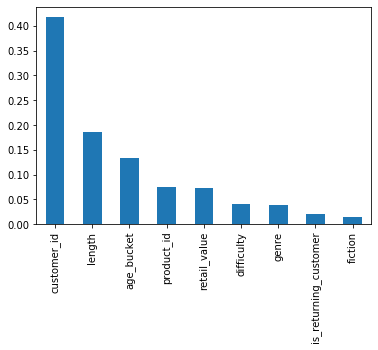

In [73]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

In [74]:
# Building Model by using top(5) features:

In [76]:
xtrain.drop(columns=['genre','is_returning_customer','fiction'],inplace=True)
xtest.drop(columns=['genre','is_returning_customer','fiction'],inplace=True)

In [77]:
model=xg.fit(xtrain,ytrain)
predicters=model.predict(xtest)
print('accuracy score:{}'.format(accuracy_score(ytest,predicters)))

accuracy score:0.7527777777777778


In [78]:
confusion_matrix(ytest,predicters) # seems that the False negative is increased and accuracy is decreased.

array([[5827, 1092],
       [1578, 2303]], dtype=int64)

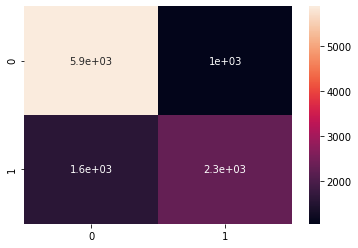

In [79]:
sns.heatmap(confusion_matrix(ytest,predicter),annot=True)

In [80]:
# seems that the False negative is increased and accuracy is decreased so using all the features.

# Splliting the data set:

In [84]:
# Modeling by using all features and now using full data for model building
X=train.drop(columns='purchased')
y=train['purchased']
model=xg.fit(X,y)
predicters=model.predict(test)

In [85]:
test['purchased']=predicters

In [89]:
# Previous month sales calculations:
last_month_sales_h=sum(train[train['purchased']==True]['retail_value'])
Total_books_bought_lastmonth=len(train[train['purchased']==True]['retail_value'])
Total_books_NOTbought_lastmonth=len(train[train['purchased']==False]['retail_value'])
totalsale1_lastmonth=(last_month_sales_h-(Total_books_bought_lastmonth*0.6)) #EXCLUDING Notbought products shipping charges
totalsale_lastmonth=(totalsale1_lastmonth-(Total_books_NOTbought_lastmonth*1.2)) #sum total
print('Total sales happaned last month:{}'.format(round(totalsale_lastmonth,2)))

Total sales happaned last month:116024.76


In [90]:
# Next month sales calculations:
next_month_sales_p=sum(test[test['purchased']==True]['retail_value'])
Total_books_willbuy_nextmonth=len(test[test['purchased']==True]['retail_value'])
Total_books_willNOTbuy_nextmonth=len(test[test['purchased']==False]['retail_value'])
totalsale1_nextmonth=(next_month_sales_p-(Total_books_willbuy_nextmonth*0.6))
totalsale_nextmonth=(totalsale1_nextmonth-(Total_books_willNOTbuy_nextmonth*1.2))
print('Total sales happaned last month:{}'.format(round(totalsale_nextmonth,2)))

Total sales happaned last month:123767.29


In [99]:
# Will we be able to both pay back our loan and afford our next book purchase order?  (case study question)
Total_sales_bothmonths=totalsale_lastmonth+totalsale_nextmonth
profit=(totalsale_lastmonth+totalsale_nextmonth)-total_amount
print('Total_sales_bothmonths:{}'.format(round(total_sales_bothmonths,2)))
print('Proit:{}'.format(round(profit,2)))

Total_sales_bothmonths:239792.05
Proit:80090.12


In [96]:
if Total_sales_bothmonths > total_amount:
    print('Yes')
else:
    print('No')

Yes


In [ ]:
# So we can see that we are able to pay back the loan amount of previous month and can also order new stock and save some money
#for party.
# we are able to make profits of 80090.12.
# Thank you